<a href="https://colab.research.google.com/github/cijinjosephjohn/Intrusion-Detection/blob/main/MiniProject_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [206]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [207]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [208]:
data1 = pd.read_csv("/content/drive/MyDrive/data_set for intrusion detection/KDDCup99.csv")

In [209]:
data1.head()

,id,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,1,0,tcp,http,SF,181,5450,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,2,0,tcp,http,SF,239,486,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,3,0,tcp,http,SF,235,1337,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,4,0,tcp,http,SF,219,1337,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,5,0,tcp,http,SF,217,2032,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [210]:
print("Train data has {} rows & {} columns".format(data1.shape[0],data1.shape[1]))

Train data has 494020 rows & 43 columns


In [211]:
data1['label'].value_counts()

smurf              280790
neptune            107201
normal              97277
back                 2203
satan                1589
ipsweep              1247
portsweep            1040
warezclient          1020
teardrop              979
pod                   264
nmap                  231
guess_passwd           53
buffer_overflow        30
land                   21
warezmaster            20
imap                   12
rootkit                10
loadmodule              9
ftp_write               8
multihop                7
phf                     4
perl                    3
spy                     2
Name: label, dtype: int64

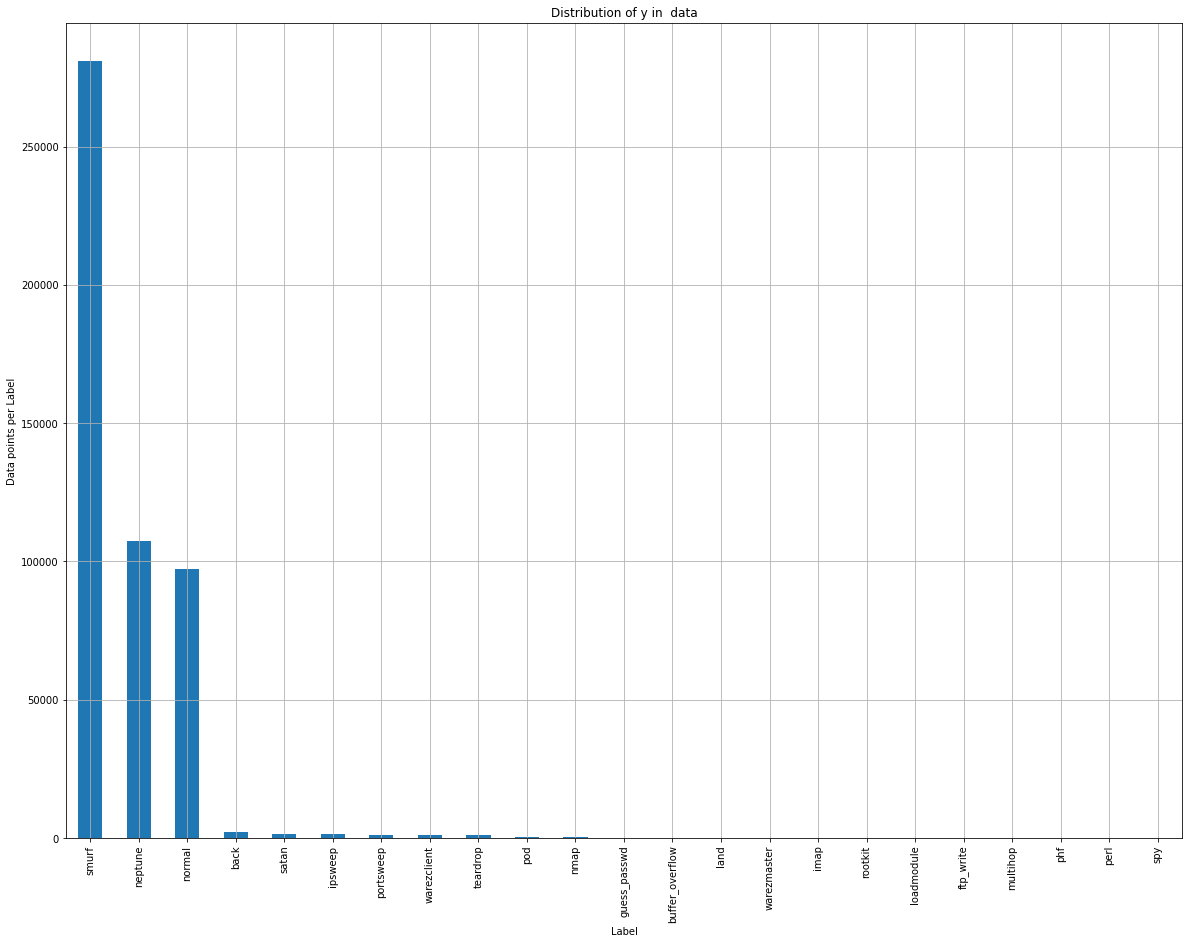

In [212]:
plt.figure(figsize=(20,15))
class_distribution = data1['label'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Data points per Label')
plt.title('Distribution of y in  data')
plt.grid()
plt.show()

In [213]:

attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

In [214]:

data1['label'] = data1['label'].apply(lambda v : attacks_types[v])

In [215]:
data1.head()

,id,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,1,0,tcp,http,SF,181,5450,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,2,0,tcp,http,SF,239,486,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,3,0,tcp,http,SF,235,1337,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,4,0,tcp,http,SF,219,1337,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,5,0,tcp,http,SF,217,2032,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [216]:
data1['label'].value_counts()

dos       391458
normal     97277
probe       4107
r2l         1126
u2r           52
Name: label, dtype: int64

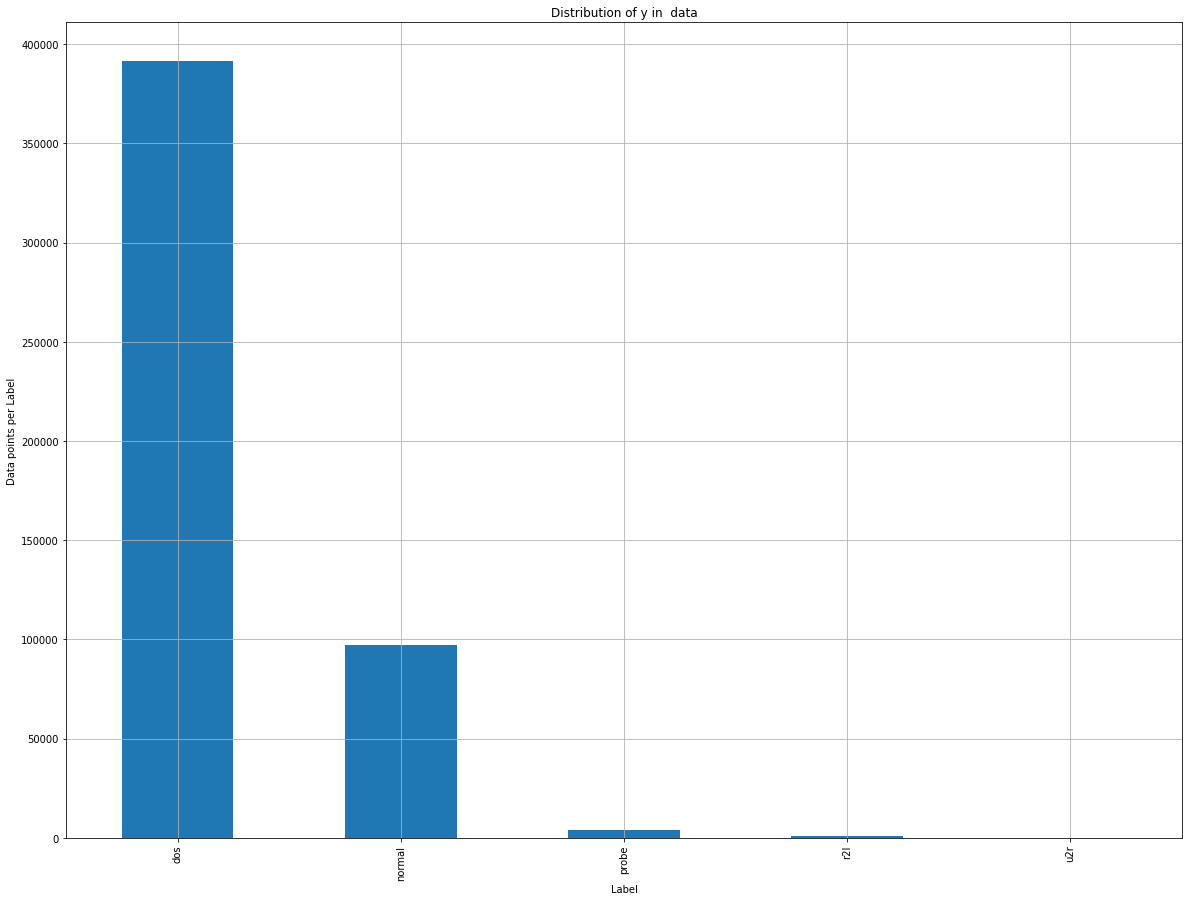

In [217]:
plt.figure(figsize=(20,15))
class_distribution = data1['label'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Data points per Label')
plt.title('Distribution of y in  data')
plt.grid()
plt.show()

In [218]:
print("data has {} rows & {} columns".format(data1.shape[0],data1.shape[1]))

data has 494020 rows & 43 columns


In [219]:
# import seaborn as sns
  
# data1 = data1[[col for col in data1 if data1[col].nunique() > 1]]
# corr = data1.corr()
# plt.figure(figsize =(15, 12))
  
# sns.heatmap(corr)
  
# plt.show()

In [220]:
data1.dtypes

id                               int64
duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
lnum_compromised                 int64
lroot_shell                      int64
lsu_attempted                    int64
lnum_root                        int64
lnum_file_creations              int64
lnum_shells                      int64
lnum_access_files                int64
lnum_outbound_cmds               int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate              

In [221]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = data1.select_dtypes(include=['float64','int64']).columns
sc_data = scaler.fit_transform(data1.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
sc_dataframe1 = pd.DataFrame(sc_data, columns = cols)

In [222]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# extract categorical attributes from data sets 
cat_data1 = data1.select_dtypes(include=['object']).copy()

# encode the categorical attributes
en_data1 = cat_data1.apply(encoder.fit_transform)


In [223]:
data1_df = pd.concat([sc_dataframe1,en_data1],axis=1)
data1_df.shape

(494020, 43)

In [224]:
data1_df.describe()

,id,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,label
count,4.940200e+05,4.940200e+05,4.940200e+05,4.940200e+05,4.940200e+05,4.940200e+05,4.940200e+05,4.940200e+05,4.940200e+05,4.940200e+05,...,4.940200e+05,4.940200e+05,4.940200e+05,4.940200e+05,4.940200e+05,4.940200e+05,494020.000000,494020.000000,494020.000000,494020.000000
mean,3.313814e-17,-3.720849e-17,-4.818263e-19,1.369250e-17,7.479094e-18,3.428877e-17,-2.443291e-18,-2.876575e-17,5.968893e-18,-9.941442e-17,...,2.107954e-16,8.284535e-18,-2.485361e-17,-1.896238e-16,2.319670e-16,1.146027e-16,0.467131,23.408896,7.842444,0.220795
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,0.575606,13.538346,2.250855,0.451232
min,-1.732047e+00,-6.779179e-02,-3.061688e-03,-2.628725e-02,-6.673424e-03,-4.772023e-02,-2.571471e-03,-4.413596e-02,-9.782195e-03,-4.171889e-01,...,-1.250624e+00,-1.586295e-01,-4.644182e-01,-4.632030e-01,-2.520398e-01,-2.494643e-01,0.000000,0.000000,0.000000,0.000000
25%,-8.660237e-01,-6.779179e-02,-3.016152e-03,-2.628725e-02,-6.673424e-03,-4.772023e-02,-2.571471e-03,-4.413596e-02,-9.782195e-03,-4.171889e-01,...,-1.250624e+00,-1.586295e-01,-4.644182e-01,-4.632030e-01,-2.520398e-01,-2.494643e-01,0.000000,14.000000,9.000000,0.000000
50%,0.000000e+00,-6.779179e-02,-2.535489e-03,-2.628725e-02,-6.673424e-03,-4.772023e-02,-2.571471e-03,-4.413596e-02,-9.782195e-03,-4.171889e-01,...,8.270455e-01,-1.586295e-01,-4.644182e-01,-4.632030e-01,-2.520398e-01,-2.494643e-01,0.000000,14.000000,9.000000,0.000000
75%,8.660237e-01,-6.779179e-02,-2.017384e-03,-2.628725e-02,-6.673424e-03,-4.772023e-02,-2.571471e-03,-4.413596e-02,-9.782195e-03,-4.171889e-01,...,8.270455e-01,-1.586295e-01,-4.644182e-01,-4.632030e-01,-2.520398e-01,-2.494643e-01,1.000000,42.000000,9.000000,0.000000
max,1.732047e+00,8.234731e+01,7.016393e+02,1.560109e+02,1.498481e+02,2.220661e+01,5.444366e+02,3.831400e+01,3.221635e+02,2.396996e+00,...,8.270455e-01,2.357581e+01,2.163060e+00,2.162025e+00,4.084671e+00,4.095711e+00,2.000000,65.000000,10.000000,4.000000


In [225]:
data1_df.head()

,id,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,label
0,-1.732047,-0.067792,-0.002879,0.138664,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.396996,...,-1.022080,-0.158629,-0.464418,-0.463203,-0.25204,-0.249464,1,22,9,1
1,-1.732040,-0.067792,-0.002820,-0.011578,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.396996,...,-1.146741,-0.158629,-0.464418,-0.463203,-0.25204,-0.249464,1,22,9,1
2,-1.732033,-0.067792,-0.002824,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.396996,...,-1.188294,-0.158629,-0.464418,-0.463203,-0.25204,-0.249464,1,22,9,1
3,-1.732026,-0.067792,-0.002840,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.396996,...,-1.188294,-0.158629,-0.464418,-0.463203,-0.25204,-0.249464,1,22,9,1
4,-1.732019,-0.067792,-0.002842,0.035214,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.396996,...,-1.209071,-0.158629,-0.464418,-0.463203,-0.25204,-0.249464,1,22,9,1


In [226]:
#dividing the data to 2 categories X and Y for training
X = data1_df.drop(columns=['id','label'],axis=1)
Y = data1_df['label']

In [227]:
X.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag
0,-0.067792,-0.002879,0.138664,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.396996,-0.005679,...,-0.282867,-1.022080,-0.158629,-0.464418,-0.463203,-0.25204,-0.249464,1,22,9
1,-0.067792,-0.002820,-0.011578,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.396996,-0.005679,...,-0.282867,-1.146741,-0.158629,-0.464418,-0.463203,-0.25204,-0.249464,1,22,9
2,-0.067792,-0.002824,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.396996,-0.005679,...,-0.282867,-1.188294,-0.158629,-0.464418,-0.463203,-0.25204,-0.249464,1,22,9
3,-0.067792,-0.002840,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.396996,-0.005679,...,-0.282867,-1.188294,-0.158629,-0.464418,-0.463203,-0.25204,-0.249464,1,22,9
4,-0.067792,-0.002842,0.035214,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.396996,-0.005679,...,-0.282867,-1.209071,-0.158629,-0.464418,-0.463203,-0.25204,-0.249464,1,22,9


In [228]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [229]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

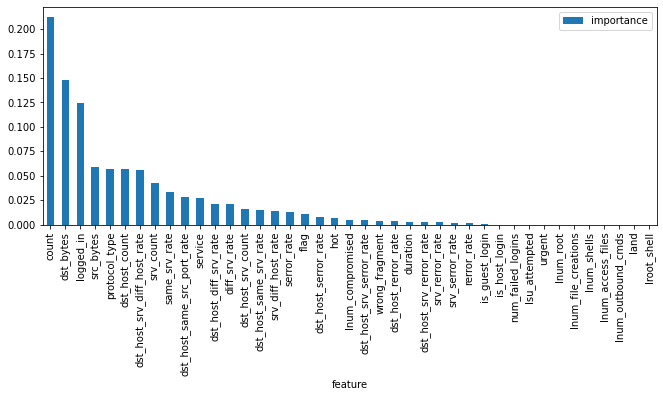

In [230]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(x_train,y_train);
# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':x_train.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar(); 

selecting the important feature by dividing the actual data set into train and test data set
and only  using the train data set we plot the importance of the data

In [231]:
from sklearn.feature_selection import RFE
import itertools
rfc = RandomForestClassifier()

# create the RFE model and select 22 attributes
rfe = RFE(rfc, n_features_to_select=22)
rfe = rfe.fit(x_train, y_train)


In [232]:

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), x_train.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['duration',
 'src_bytes',
 'dst_bytes',
 'hot',
 'logged_in',
 'lnum_compromised',
 'count',
 'srv_count',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_rerror_rate',
 'protocol_type',
 'service',
 'flag']

In [233]:
x_train.shape

(395216, 41)

In [234]:
y_train.value_counts()

0    313026
1     77953
2      3285
3       911
4        41
Name: label, dtype: int64

In [235]:
#from sklearn.svm import SVC 
#

#from sklearn.model_selection import cross_val_score
# from sklearn.neighbors import K-NeighborsClassifier
# from sklearn.linear_model import LogisticRegression




In [236]:
y_train

92954     0
225992    0
435715    0
148092    1
283930    0
         ..
437782    0
95816     0
203245    0
100879    0
351400    0
Name: label, Length: 395216, dtype: int64

In [247]:
ans =  ans ={ 0 : 'dos' , 1 : 'normal' ,2 : 'probe', 3 : 'r2l' , 4:'u2r'}
y_train = y_train.replace(ans)
y_test = y_test.replace(ans)

In [238]:
from sklearn import tree
# Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [239]:
from sklearn import metrics

# accuracy = metrics.accuracy_score(y_train, DTC_Classifier.predict(x_train))

# print(f"Accuracy = {accuracy}")

# accuracy2 = metrics.accuracy_score(y_test, DTC_Classifier.predict(x_test))

# print(f"\nAccuracy of test = {accuracy2}")

In [240]:
from sklearn.model_selection import cross_val_score
#finding the cross validation accuracy
scores = cross_val_score(DTC_Classifier,x_train,y_train,cv=10)


In [241]:
# confusion_matrix = metrics.confusion_matrix(y_train,DTC_Classifier.predict(x_train))

In [242]:
# classification = metrics.classification_report(y_train,DTC_Classifier.predict(x_train))

In [243]:
#print(f"Scores \n {scores}\n")
#\nConfusion matrix \n {confusion_matrix}\n\nclassification \n{classification}\n")

In [244]:
accuracy = metrics.accuracy_score(y_train, DTC_Classifier.predict(x_train))
#scores = cross_val_score(DTC_Classifier,x_train,y_train,cv=10)
confusion_matrix = metrics.confusion_matrix(y_train,DTC_Classifier.predict(x_train))
classification = metrics.classification_report(y_train,DTC_Classifier.predict(x_train))


In [245]:
print('------------Decision Tree Model Evaluation------------')
print(f'Cross Validation Scores \n{scores}\n')
print(f'Model Accuracy : {accuracy}\n')
print(f'Confusion Matrix :\n{confusion_matrix}\n')
print(f'Classification report : \n {classification}\n')

------------Decision Tree Model Evaluation------------
Cross Validation Scores 
[0.99984819 0.99962046 0.99956986 0.99977228 0.99972167 0.99974698
 0.99982288 0.99964576 0.99989879 0.99951924]

Model Accuracy : 0.9999974697380672

Confusion Matrix :
[[313026      0      0      0      0]
 [     1  77952      0      0      0]
 [     0      0   3285      0      0]
 [     0      0      0    911      0]
 [     0      0      0      0     41]]

Classification report : 
               precision    recall  f1-score   support

         dos       1.00      1.00      1.00    313026
      normal       1.00      1.00      1.00     77953
       probe       1.00      1.00      1.00      3285
         r2l       1.00      1.00      1.00       911
         u2r       1.00      1.00      1.00        41

    accuracy                           1.00    395216
   macro avg       1.00      1.00      1.00    395216
weighted avg       1.00      1.00      1.00    395216




In [248]:
accuracy = metrics.accuracy_score(y_test, DTC_Classifier.predict(x_test))
scores = cross_val_score(DTC_Classifier,x_test,y_test,cv=10)
confusion_matrix = metrics.confusion_matrix(y_test,DTC_Classifier.predict(x_test))
classification = metrics.classification_report(y_test,DTC_Classifier.predict(x_test))

In [249]:
print('------------Decision Tree Model Validation------------')
print(f'Cross Validation Scores \n{scores}\n')
print(f'Model Accuracy : {accuracy}\n')
print(f'Confusion Matrix :\n{confusion_matrix}\n')
print(f'Classification report : \n {classification}\n')

------------Decision Tree Model Validation------------
Cross Validation Scores 
[0.99929157 0.99908916 0.99969639 0.99919037 0.9992915  0.99939271
 0.99979757 0.99959514 0.99919028 0.99959514]

Model Accuracy : 0.9997469738067285

Confusion Matrix :
[[78430     1     1     0     0]
 [    0 19311     7     6     0]
 [    0     5   817     0     0]
 [    0     1     0   211     3]
 [    0     1     0     0    10]]

Classification report : 
               precision    recall  f1-score   support

         dos       1.00      1.00      1.00     78432
      normal       1.00      1.00      1.00     19324
       probe       0.99      0.99      0.99       822
         r2l       0.97      0.98      0.98       215
         u2r       0.77      0.91      0.83        11

    accuracy                           1.00     98804
   macro avg       0.95      0.98      0.96     98804
weighted avg       1.00      1.00      1.00     98804




In [250]:
# 
from sklearn.naive_bayes import BernoulliNB 
# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(x_train, y_train)

BernoulliNB()

In [251]:
accuracy = metrics.accuracy_score(y_train, BNB_Classifier.predict(x_train))
scores = cross_val_score(BNB_Classifier,x_train,y_train,cv=10)
confusion_matrix = metrics.confusion_matrix(y_train,BNB_Classifier.predict(x_train))
classification = metrics.classification_report(y_train,BNB_Classifier.predict(x_train))


In [252]:
print('------------Naive Baye Model Evaluation------------')
print(f'Cross Validation Scores \n{scores}\n')
print(f'Model Accuracy : {accuracy}\n')
print(f'Confusion Matrix :\n{confusion_matrix}\n')
print(f'Classification report : \n {classification}\n')

------------Naive Baye Model Evaluation------------
Cross Validation Scores 
[0.93304995 0.93089925 0.93229088 0.93097515 0.93069683 0.9304438
 0.93087219 0.93109992 0.93115053 0.93223856]

Model Accuracy : 0.9313691753370309

Confusion Matrix :
[[294555   1510  16470     18    473]
 [  2083  71121   4322    372     55]
 [   204   1025   2056      0      0]
 [     8    554      6    336      7]
 [     0     13      0      4     24]]

Classification report : 
               precision    recall  f1-score   support

         dos       0.99      0.94      0.97    313026
      normal       0.96      0.91      0.93     77953
       probe       0.09      0.63      0.16      3285
         r2l       0.46      0.37      0.41       911
         u2r       0.04      0.59      0.08        41

    accuracy                           0.93    395216
   macro avg       0.51      0.69      0.51    395216
weighted avg       0.98      0.93      0.95    395216




StratifiedKFold cross validation is used by cv=10

In [253]:
accuracy2 = metrics.accuracy_score(y_test, BNB_Classifier.predict(x_test))
scores = cross_val_score(BNB_Classifier,x_test,y_test,cv=10)
confusion_matrix = metrics.confusion_matrix(y_test,BNB_Classifier.predict(x_test))
classification = metrics.classification_report(y_test,BNB_Classifier.predict(x_test))

In [254]:
print('------------Naive Baye Model Validation------------')
print(f'Cross Validation Scores \n{scores}\n')
print(f'Model Accuracy : {accuracy}\n')
print(f'Confusion Matrix :\n{confusion_matrix}\n')
print(f'Classification report : \n {classification}\n')

------------Naive Baye Model Validation------------
Cross Validation Scores 
[0.92521    0.93310394 0.9368485  0.92682927 0.93248988 0.93502024
 0.92975709 0.92894737 0.92560729 0.93026316]

Model Accuracy : 0.9313691753370309

Confusion Matrix :
[[73840   358  4127     1   106]
 [  559 17537  1109   110     9]
 [   44   264   514     0     0]
 [    3   117     0    94     1]
 [    0     3     0     1     7]]

Classification report : 
               precision    recall  f1-score   support

         dos       0.99      0.94      0.97     78432
      normal       0.96      0.91      0.93     19324
       probe       0.09      0.63      0.16       822
         r2l       0.46      0.44      0.45       215
         u2r       0.06      0.64      0.10        11

    accuracy                           0.93     98804
   macro avg       0.51      0.71      0.52     98804
weighted avg       0.98      0.93      0.95     98804




In [255]:
#print(f"\nAccuracy of test = {accuracy2}")

In [256]:
#print(f"Scores \n {scores}\n\nConfusion matrix \n {confusion_matrix}\n\nclassification \n{classification}\n")

In [257]:
# from xgboost import XGBClassifier
# xgboost_classifier = XGBClassifier()
# xgboost_classifier.fit(x_train,y_train)

In [258]:
# scores = cross_val_score(xgboost_classifier,x_train,y_train,cv=10)
# confusion_matrix = metrics.confusion_matrix(y_train,xgboost_classifier.predict(x_train))
# classification = metrics.classification_report(y_train,xgboost_classifier.predict(x_train))

In [259]:
# from sklearn.neighbors import KNeighborsClassifier
# KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
# KNN_Classifier.fit(x_train,y_train);